# Laptop Price Prediction

### Table of Contents

### Introduction

This notebook performs data preparation of the laptop prices dataset.

In [1]:
# libraries used
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from scipy import stats
import statsmodels.api as sm
#from scipy.stats import f_oneway
import missingno


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/laptop_price.csv")

In [3]:
# pandas head() function reveals a lot about the data here
# the data is a mix of data types
# looks like some features can be extracted by splitting some columns,

# Price_euros will be the target feature, making this a supervised learning, or regression, task
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
# laptop_ID is an identifier
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### Selection of functions used

In [8]:
# function to format some of the variable names
def string_format(var):
    if var == "Price_euros":
        return "Price (€)"
    else:
        var_formatted = " ".join(re.findall('[A-Z][^A-Z]*', var))
        return var_formatted  

In [9]:
# histogram plot
def histogram_plot(df, var, bins="auto", h=4, w=6):
    
    title = f"Distribution of {string_format(var)}"

    plt.figure(figsize=(w, h))
    sns.histplot(data=df, x=var, bins=bins)
    

    plt.title(title)
    plt.xlabel(string_format(var))
    plt.ylabel('Count')

    plt.xticks(rotation=45)
    
    plt.show()

In [10]:
def boxplots(df, x, y="Price_euros",h=4, w=10, title_add=""):
    plt.figure(figsize=(w, h))
    sns.boxplot(data=df, x=x, y=y)
    
    plt.xlabel(string_format(x))
    plt.ylabel(y)
    plt.title(f'Comparison of Laptop Prices by {string_format(x)}{title_add}')
    
    
    plt.xticks(rotation=45)
    
    plt.show()

In [11]:
def scatter_plot(df, x, y, h=4, w=6, hue=None, regline=False):

    title = f"Scatterplot of {x} vs {y}"
    

    plt.figure(figsize=(w, h))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette="Dark2")
    if regline:
        sns.regplot(data=df, x=x, y=y, scatter=False, color='red')
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

### Further exploration and wrangling

The features will be prepared in sequence.

#### Laptop_ID

In [12]:
# laptop_ID is a unique identifier, for some reason it skips some numbers 
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [13]:
# laptop_ID held no signal and is dropped
df = df.drop(["laptop_ID"], axis=1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Company

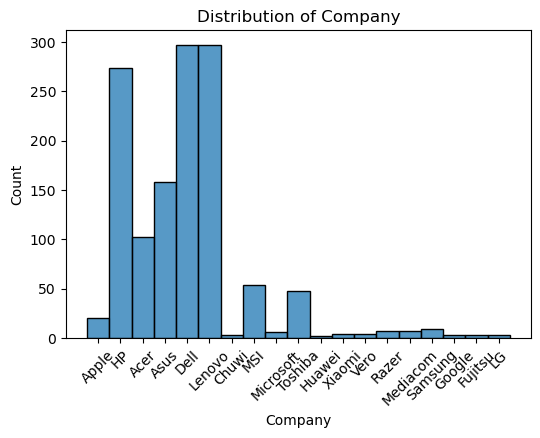

In [14]:
# some companies aren't represented much in the data
# their counts are small enough that a statistical analysis is unpractical

# it's likely that company has effect on price, but also that companies use different parts that influence price



histogram_plot(df, "Company")

In [15]:
# there are 19 unique entries
print("Number of unique companies: ", len(df.Company.unique()))

# some of the entries have a small amount of entries
# they would either need removed or encoded as 'other' etc.
df.Company.value_counts()

Number of unique companies:  19


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

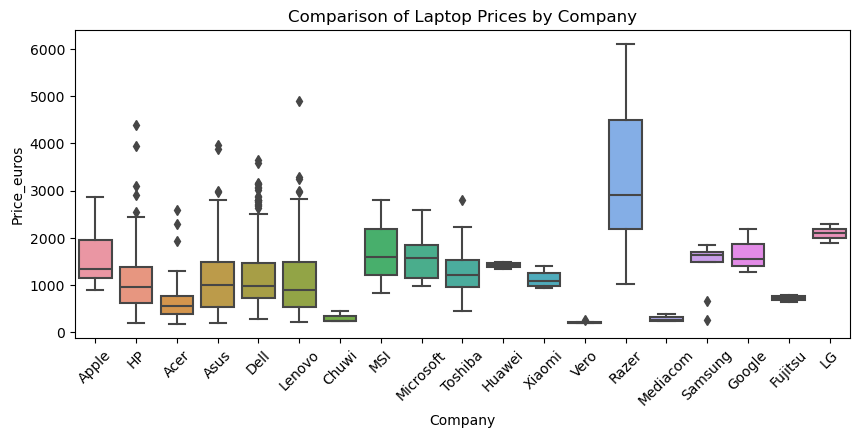

In [16]:
# looking at the distributions a few things are seen:

# 'Razer' stands out as having a large spread, although it only has 7 entries
# suggests that the actual quartile ranges of an average razer laptop isn't captured and more data is needed
# and with more data outliers could be identified

# there is a difference in means which should be investigated
# if there is a statistical significance in the mean differences of some of the categories then 'Company' may be a good indicator of price
# it's also likely that the signal from 'Company' is encoded in other variables like 'Product' 
boxplots(df, "Company")

In [17]:
# the average laptop price is €1123
print("Average laptop price: ", df["Price_euros"].mean())

Average laptop price:  1123.6869915579432


In [18]:
# the mean prices are different
mean_prices = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

print(mean_prices)

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1186.068990
Xiaomi       1133.462500
Asus         1104.169367
Lenovo       1086.384444
HP           1067.774854
Fujitsu       729.000000
Acer          626.775825
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64


In [19]:
# value counts df
counts = df['Company'].value_counts()

# filtering companies with less than 20 values
_ = df[df['Company'].isin(counts[counts > 20].index)]

# mean prices run again
# it's likely that there is statistically significant differences here, at least for some values
# which would be enough rational to include company in modelling.. of course smaller valu
companies_with_20 = _.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
print(companies_with_20)

Company
MSI        1728.908148
Apple      1564.198571
Toshiba    1267.812500
Dell       1186.068990
Asus       1104.169367
Lenovo     1086.384444
HP         1067.774854
Acer        626.775825
Name: Price_euros, dtype: float64


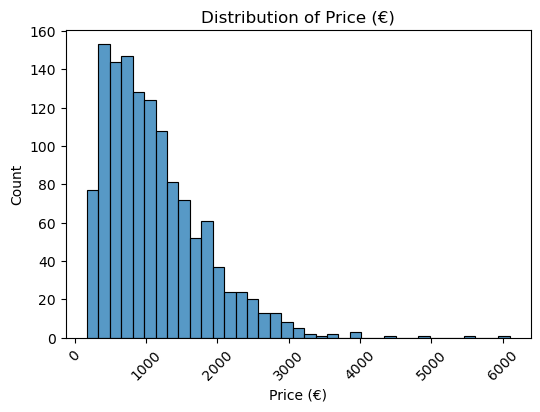

In [20]:
# The above mean values do indicate differences in price
# but we can connuct an ANOVA test on the data to have statistical evidence of different populations
# for this test only the companies that are represented at least 20 times will be used.

# One assumption of ANOVA is normality...
# 'Price_euros' should be log-normal, it is right skewed with outliers (shown in the boxplots above)
histogram_plot(df, "Price_euros")

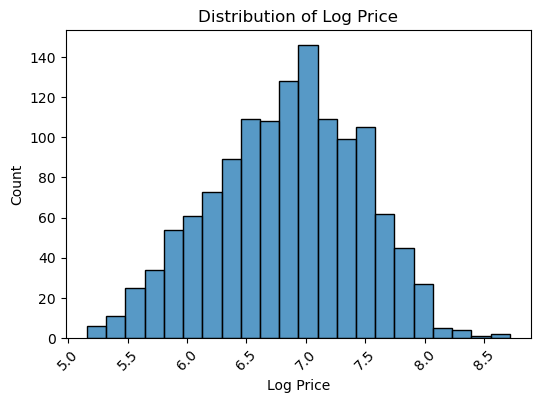

In [21]:
# a log transformation or 'Price_euros' looks normal
df['LogPrice'] = np.log(df['Price_euros'])

histogram_plot(df, "LogPrice")

In [22]:
# a shapiro wilk test is performed
# H0: states the data is normally distributed
# H1: states that the data is not normally distributed

# When conducted on 'LogPrice' a p-value of 3.63e-06 is less than the critical level needed of 0.05...
# ...therefore we reject the null hypothesis and accept the alternative hypothesis
stats.shapiro(df.LogPrice)

ShapiroResult(statistic=0.9925209879875183, pvalue=3.630284027167363e-06)

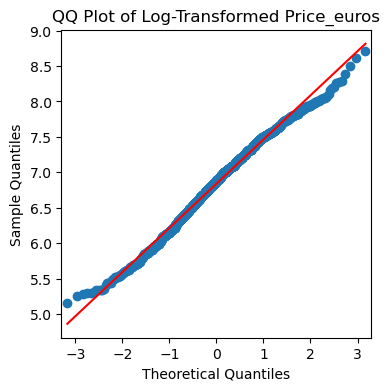

In [23]:
# Price is close to being log-normal and this can be understood better with a Quantile-Quantile plot
# the lower and upper quantiles deviate from normality... which is shown in the histogram above... but harder to visually comprehend there
fig, ax = plt.subplots(figsize=(4, 4))
sm.qqplot(df["LogPrice"], line='s', ax=ax)
ax.set_title('QQ Plot of Log-Transformed Price_euros')
plt.show()


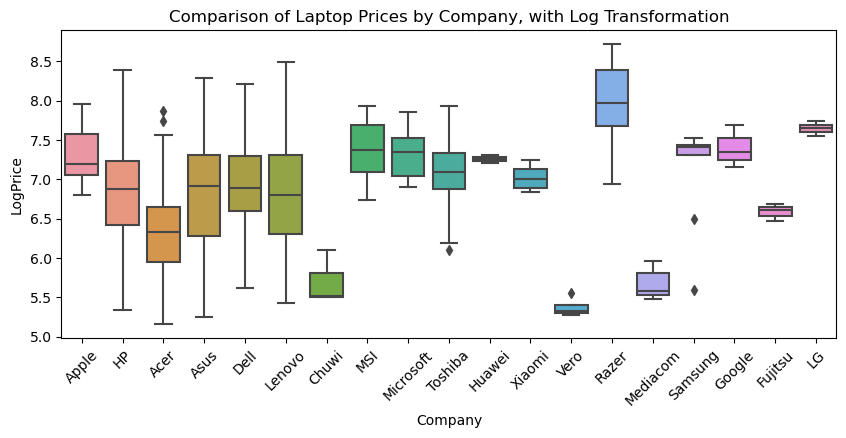

In [24]:
# still it's possible that there may be normallity in some of the categories to perform ANOVA
# when the boxplot is replotted with the log transformation some of the plots do seem normally distributed...
# ...which of course can be tested for
boxplots(df, "Company", y="LogPrice", title_add=", with Log Transformation")

In [25]:
# companies that had more than 20 entries from before
list(companies_with_20.index)

['MSI', 'Apple', 'Toshiba', 'Dell', 'Asus', 'Lenovo', 'HP', 'Acer']

In [26]:
# shapiro wilk tests is conducted on the companies with at least 20 entries
# H0: states the data is normally distributed
# H1: states that the data is not normally distributed

# There is a mix of results and caution should be used to not look to deep for meaningful results...
# ...that support one 

for i in list(companies_with_20.index):
    print(f"Shapiro Wilk test for {i} price")
    print(stats.shapiro(df.LogPrice[df.Company == i]), "\n")

Shapiro Wilk test for MSI price
ShapiroResult(statistic=0.9531937837600708, pvalue=0.03433043137192726) 

Shapiro Wilk test for Apple price
ShapiroResult(statistic=0.9453742504119873, pvalue=0.2777377963066101) 

Shapiro Wilk test for Toshiba price
ShapiroResult(statistic=0.9594073295593262, pvalue=0.0955389142036438) 

Shapiro Wilk test for Dell price
ShapiroResult(statistic=0.9915080666542053, pvalue=0.08532478660345078) 

Shapiro Wilk test for Asus price
ShapiroResult(statistic=0.9735321998596191, pvalue=0.003926434554159641) 

Shapiro Wilk test for Lenovo price
ShapiroResult(statistic=0.9873015880584717, pvalue=0.010329941287636757) 

Shapiro Wilk test for HP price
ShapiroResult(statistic=0.9913017153739929, pvalue=0.10487513244152069) 

Shapiro Wilk test for Acer price
ShapiroResult(statistic=0.9746764302253723, pvalue=0.045162152498960495) 



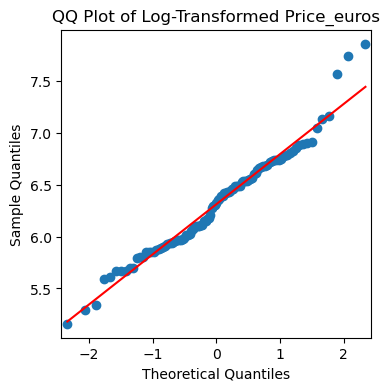

In [27]:
# Acer was close to rejecting the null hypothesis and exhibiting normal distribution
# the boxplot suggests that outliers after the upper quantile could be at fault
# this can be confirmed with a QQ Plot, with those outliers being the largest deviation from normality
fig, ax = plt.subplots(figsize=(4, 4))
sm.qqplot(df[df["Company"]=="Acer"]["LogPrice"], line='s', ax=ax)
ax.set_title('QQ Plot of Log-Transformed Price_euros')
plt.show()

In [28]:
# ANOVA will be performed, although it's already suspected that there is difference in the categories according to price...
# ...ANOVA gives evidence that these differences exist statistically

# three values are used
# different combinations could be tested (with adjustments to significance level to account for false positives)
# Three log normal distributed values with simialar means are chosen

# printing the means of the selected companies for reference}
selected_companies = ['HP', 'Dell', 'Toshiba']
selected_prices = companies_with_20.loc[selected_companies]
print("Mean Prices")
print(selected_prices)

Mean Prices
Company
HP         1067.774854
Dell       1186.068990
Toshiba    1267.812500
Name: Price_euros, dtype: float64


In [29]:
# For ANOVA the following hypothesis are made:
# H0: There is no significance difference in the means (suggesting they came from the one population
# H1: There is significant difference in the means of the compared groups, suggesting at least one group mean is different that the others

# note: Exploration of 'Company' allows insight into the data, but it may be in this case that 'Company' is encoded through 'Product'...
# ... and that the feature can be dropped altogether.. taking the macro view of the products has allowed statistcal insight into the pricing...
# ... of laptops

# note2: domain knowledge of laptop pricing would know that some laptop makers have difference pricing strategies and it wouldn't be expected...
# ... that they would be from the same 'population' and ANOVA is a great way to confirm this

# selecting data to perform ANOVA
dell_prices = df[df["Company"] == "Dell"]["LogPrice"]
toshiba_prices = df[df["Company"] == "Toshiba"]["LogPrice"]
hp_prices = df[df["Company"] == "HP"]["LogPrice"]

# One-way ANOVA
f_statistic, p_value = stats.f_oneway(dell_prices, toshiba_prices, hp_prices)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 6.263581311528418
p-value: 0.002027923785024817


In [30]:
# for now there is no plans to use the LogValue of price
#df = df.drop(["LogPrice"], axis=1)

In [31]:
# A strategy is needed for the underrepresented companies, they could be labelled as 'other'
# Razer stood out as having a different distribution when visualising

razer_df = df[df["Company"] == "Razer"]
razer_df["Price_euros"].mean()

3346.1428571428573

In [32]:
# looking at the dataframe we see a large range in price
# the lower priced razer laptops are ultrabooks rather than gaming lapotops.. they have smaller sizes.. on the lower end of memory and ram...
# ... different gpus and lower weight
razer_df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,LogPrice
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0,8.715880
647,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2599.0,7.862882
778,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2899.0,7.972121
816,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0,7.494986
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0,8.612322
1117,Razer,Blade Stealth,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.25kg,1029.0,6.936343
1231,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,3499.0,8.160232


In [33]:
# it's possible that these are bigger indicators of price than company and the underrepresented companies could be labelled as 'other' instead of removal
# for now any values below 20 will be labelled as other to help with dimmensionality later
# filtering companies with less than 20 values
d1 = df[df['Company'].isin(counts[counts < 20].index)]

# making it a list
companies = list(d1["Company"].unique())
print(len(companies))

# replacing with other
df["Company"] = df["Company"].replace(companies, "Other")

11


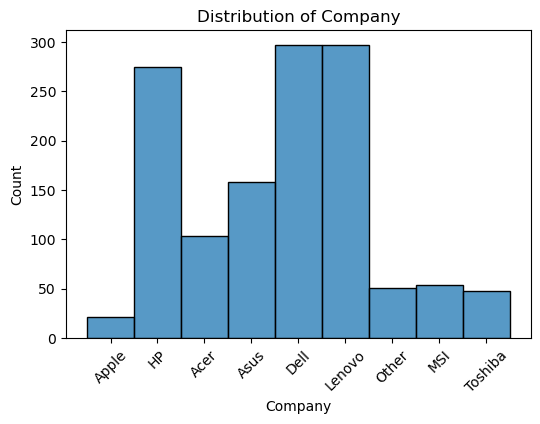

In [34]:
# Other is still a minority class and dimensionality after encoding will be lower and 
histogram_plot(df, "Company")

#### Product

In [35]:
# There are 618 unique products
df["Product"].nunique()

618

In [36]:
# product seems to encode information about the model and model type
# there is a lot of data to manually check
# XPS 13 is the mode
df["Product"].value_counts().head(20)

Product
XPS 13                30
Inspiron 3567         29
250 G6                21
Legion Y520-15IKBN    19
Vostro 3568           19
Inspiron 5570         18
ProBook 450           18
Alienware 17          15
Inspiron 5567         14
Satellite Pro         13
EliteBook 840         12
Latitude 5580         12
ThinkPad X1           12
Aspire 3              12
Inspiron 7567         10
EliteBook 850         10
MacBook Pro           10
EliteBook 820          9
Inspiron 3552          9
XPS 15                 9
Name: count, dtype: int64

In [37]:
# one simple way that might work is to take the first word of each as the model and the remaining as model type
# model type may even be redundant
# this may make the data eventually quite sparse with encoding
df['Model'] = df['Product'].str.split().str[0]
df["Model"].nunique()



225

In [38]:
df["Model"].value_counts().head(10)

Model
Inspiron     141
IdeaPad       95
Aspire        63
ThinkPad      62
Latitude      52
ProBook       50
EliteBook     45
XPS           39
Thinkpad      37
Vostro        33
Name: count, dtype: int64

In [39]:
##### Do tree map possibly ###

#### TypeName

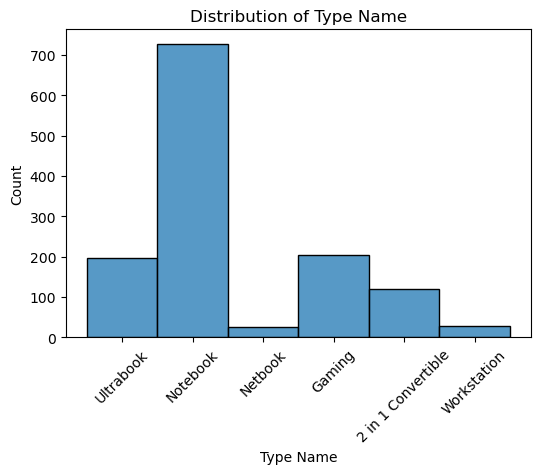

In [40]:
# Another unbalanced class with some underrepresented samples
histogram_plot(df, "TypeName")

In [41]:
df["TypeName"].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

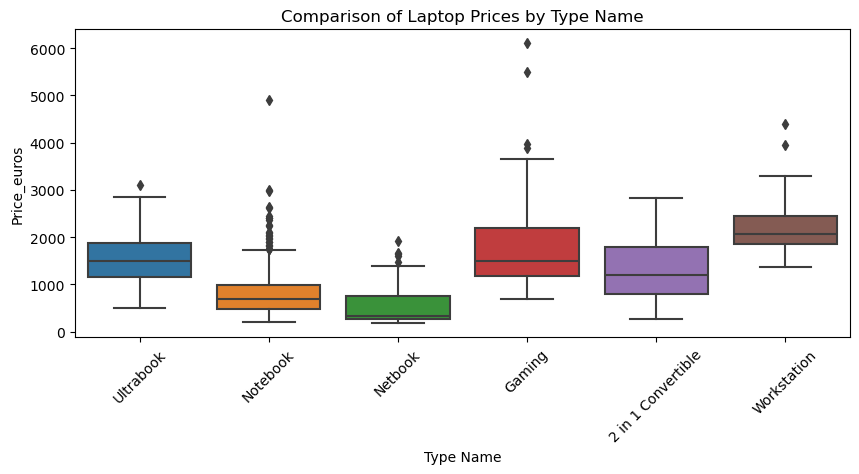

In [42]:
# it would have been tempting to group netbook and workstation together as 'Other' as before
# but they are the furthest apart in the boxplot:
# Netbooks are the cheapest laptop on average, while Workstation is the most expensice on average
# Different boxplots for each TypeName make it clear that they have different relationships with price
boxplots(df, "TypeName", y="Price_euros")

In [43]:
# encode 'TypeName'
# can make this numeric with drop first if desired
test_df = pd.get_dummies(df["TypeName"])

# numerical mapping
map = {False: 0, True: 1} 
test_df = test_df.applymap(lambda x: map.get(x, x))

# selecting y and merging
y = df["Price_euros"]
test_df = pd.concat([test_df, y], axis=1)

test_df.head()

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Price_euros
0,0,0,0,0,1,0,1339.69
1,0,0,0,0,1,0,898.94
2,0,0,0,1,0,0,575.00
3,0,0,0,0,1,0,2537.45
4,0,0,0,0,1,0,1803.60


In [44]:
# when the categories are dummy encoded we can check their correlations with price
# while the boxplots showed different distributions the correlation coefficients show the linear relationship or slope when modelled linearly
# 'Gaming' has the largest positive increase on price, while 'Notebook' has the largest negative decrease on price.
test_df.corr().tail(1)

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Price_euros
Price_euros,0.072675,0.375789,-0.097572,-0.549248,0.255658,0.249752,1.0


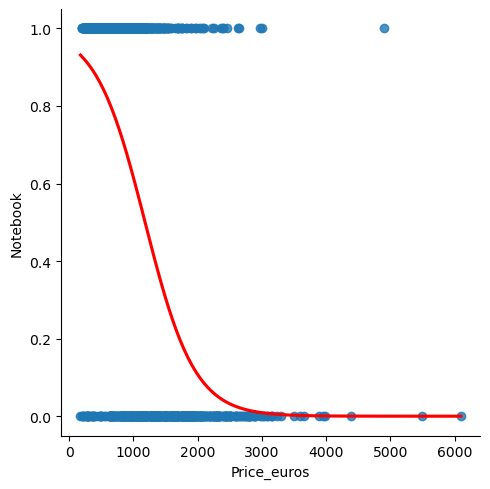

In [45]:
# Plot logistic regression... these classes are probably too unbalanced
sns.lmplot(x="Price_euros", y="Notebook", data=test_df, logistic=True, ci=None, line_kws={'color': 'red'});


#### Inches

In [46]:
# Inches is a float wtih a range of 8.3 Inches
# Inches is the screen size according to the data dictionary
df["Inches"].describe()

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

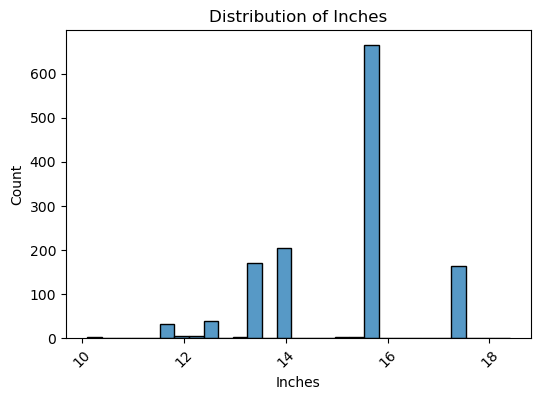

In [47]:

histogram_plot(df, "Inches")

In [48]:
print("Number of unique values of 'Inches': ", df["Inches"].nunique())
# values of inches
print("Inches values:")
print(list(df["Inches"].unique()))

Number of unique values of 'Inches':  18
Inches values:
[13.3, 15.6, 15.4, 14.0, 12.0, 11.6, 17.3, 10.1, 13.5, 12.5, 13.0, 18.4, 13.9, 12.3, 17.0, 15.0, 14.1, 11.3]


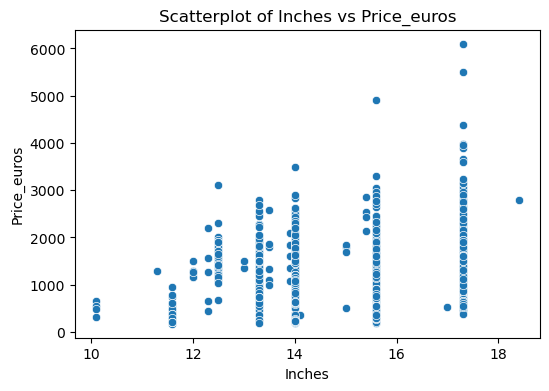

In [49]:
# a scatter plot shows that there may be a relationship between Inches and the target variable
scatter_plot(df, "Inches", "Price_euros")

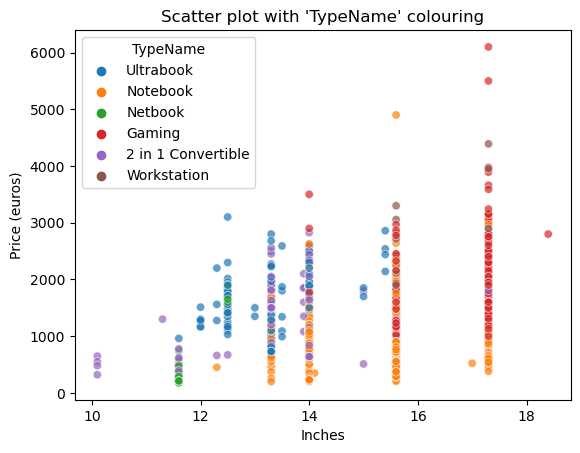

In [50]:
# Different 'TypeName's have different sizings which is expected
x = df["Inches"]
y = df["Price_euros"]
category = df["TypeName"]

# Create scatter plot with Seaborn
sns.scatterplot(x=x, y=y, hue=category, alpha=0.7)
plt.xlabel("Inches")
plt.ylabel("Price (euros)")
plt.title("Scatter plot with 'TypeName' colouring")
plt.show()

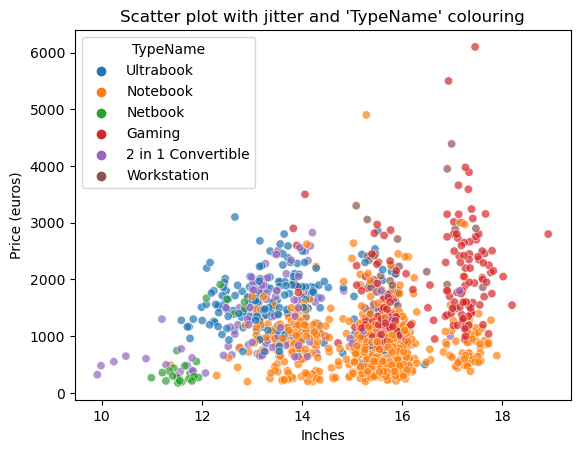

In [51]:
# with a slight jitter the TypeName separation becomes clearer 
# although the relationhip...
# ...of 'Inches' to price
x = df["Inches"] + np.random.normal(0, 0.3, len(df["Inches"]))

# seaborn scatter plot
sns.scatterplot(x=x, y=y, hue=category, alpha=0.7)
plt.xlabel("Inches")
plt.ylabel("Price (euros)")
plt.title("Scatter plot with jitter and 'TypeName' colouring")
plt.show()

In [52]:
# there is some correlation between Inches and price... although
correlation = df['Price_euros'].corr(df["Inches"] + np.random.normal(0, 0.3, len(df["Inches"])))
correlation = df['Price_euros'].corr(df["Inches"])
print("Correlation between Inches and Price_euros:", correlation)

Correlation between Inches and Price_euros: 0.06819666592963959


In [53]:
#df['Inches_Rank'] = df['Inches'].rank()

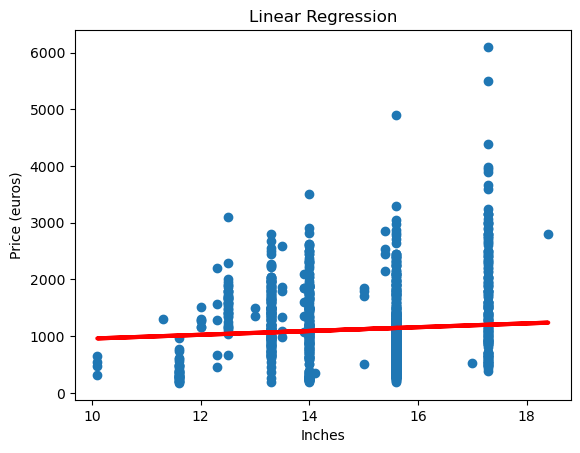

In [54]:
df1 = df.copy()



X = df1["Inches"].values.reshape(-1, 1)
y = df1["Price_euros"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel('Inches')
plt.ylabel('Price (euros)')
plt.title('Linear Regression')
plt.show()

In [55]:
# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model
mse = ((y - y_pred) ** 2).mean()
r2 = model.score(X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 621.7808298695268
Coefficients: [33.4221066]
Mean Squared Error: 485967.9571509499
R^2 Score: 0.00465078524391882


In [56]:
def adjusted_r_squared(r_squared, n, k):
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

n = 1300    # Number of observations
k = 1      # Number of predictors

adj_R2 = adjusted_r_squared(r2, n, k)
print("Adjusted R-squared:", adj_R2)


Adjusted R-squared: 0.003883952258744716


In [57]:
from sklearn.cluster import KMeans


num_clusters = 6

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(df["Inches"].values.reshape(-1, 1))

# Get cluster centroids
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

print("Cluster Centers:", cluster_centers)
print("Cluster Labels:", cluster_labels)


Cluster Centers: [[13.30348837]
 [15.59524517]
 [17.30481928]
 [11.43421053]
 [13.99754902]
 [12.42      ]]
Cluster Labels: [0 0 1 ... 4 1 1]


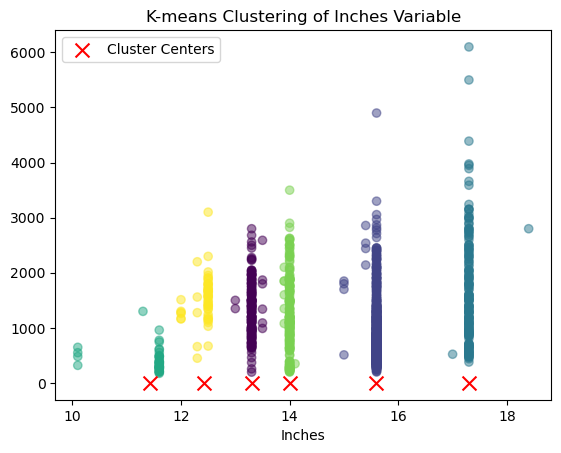

In [58]:
# Only using clusters to mark bins
plt.scatter(df["Inches"], df["Price_euros"], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Inches')
plt.title('K-means Clustering of Inches Variable')
plt.legend()
plt.show()

In [59]:
# Define the bin edges
bin_edges = [0, 11.8, 12.6, 13.7, 14.2, 16.8, float('inf')]

custom_labels = [0, 1, 2, 3, 4, 5]

# Create a new categorical variable based on binning
df["Inches_Binned"] = pd.cut(df["Inches"], bins=bin_edges, labels=custom_labels)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,LogPrice,Model,Inches_Binned
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,7.200194,MacBook,2
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,6.801216,Macbook,2
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,6.354370,250,4
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,7.838915,MacBook,4
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,7.497540,MacBook,2


In [60]:
df["Inches_Binned"].unique()

[2, 4, 3, 1, 0, 5]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

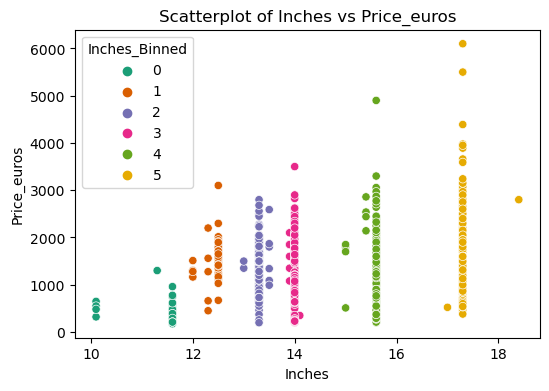

In [61]:
scatter_plot(df, "Inches", "Price_euros", hue="Inches_Binned")

In [62]:
df_dummies = pd.get_dummies(df["Inches_Binned"], prefix="Inches", drop_first=True)

print(df_dummies)

      Inches_1  Inches_2  Inches_3  Inches_4  Inches_5
0        False      True     False     False     False
1        False      True     False     False     False
2        False     False     False      True     False
3        False     False     False      True     False
4        False      True     False     False     False
...        ...       ...       ...       ...       ...
1298     False     False      True     False     False
1299     False      True     False     False     False
1300     False     False      True     False     False
1301     False     False     False      True     False
1302     False     False     False      True     False

[1303 rows x 5 columns]


In [63]:
map = {False: 0, True: 1} 
df_dummies = df_dummies.applymap(lambda x: map.get(x, x))
df_dummies

,Inches_1,Inches_2,Inches_3,Inches_4,Inches_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
1298,0,0,1,0,0
1299,0,1,0,0,0
1300,0,0,1,0,0
1301,0,0,0,1,0


In [64]:
X = df_dummies.copy()
y = df["Price_euros"]


model = LinearRegression()
model.fit(X, y)

# coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X)

mse = ((y - y_pred) ** 2).mean()
r2 = model.score(X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 428.46105263157904
Coefficients: [1083.07154737  914.690459    782.41659443  487.68000235 1244.4423811 ]
Mean Squared Error: 400145.800114575
R^2 Score: 0.18042989857400826


In [65]:
#merged_df = pd.merge(df_dummies, y, left_index=True, right_index=True)

In [66]:
#scatter_plot(merged_df, "Inches_3", "Price_euros")

#### Screen Resolution

In [67]:
df["ScreenResolution"]

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [68]:
# Extract the resolution from the "ScreenResolution" column
df["Resolution"] = df["ScreenResolution"].str.extract(r"(\d+x\d+)")

# Create a new column for the display type
df["DisplayType"] = df["ScreenResolution"].str.replace(r"\d+x\d+", "").str.strip()

# Replace empty strings with NaN
df["DisplayType"].replace("", np.nan, inplace=True)

# Drop the original "ScreenResolution" column
df.drop("ScreenResolution", axis=1, inplace=True)

display(df.head())

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,LogPrice,Model,Inches_Binned,Resolution,DisplayType
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,7.200194,MacBook,2,2560x1600,IPS Panel Retina Display 2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,6.801216,Macbook,2,1440x900,1440x900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,6.354370,250,4,1920x1080,Full HD 1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,7.838915,MacBook,4,2880x1800,IPS Panel Retina Display 2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,7.497540,MacBook,2,2560x1600,IPS Panel Retina Display 2560x1600


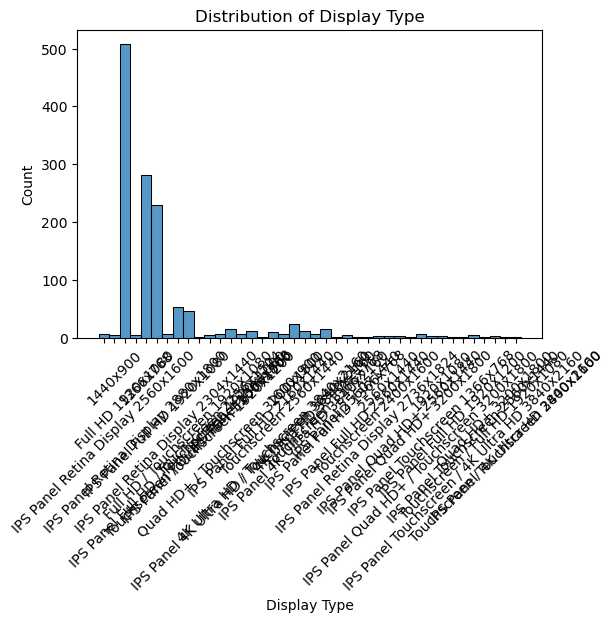

In [69]:

histogram_plot(df, "DisplayType")

In [70]:
# create touchscreen variable
touchscreen = df['DisplayType'].str.contains('Touchscreen', case=False)
df['Touchscreen'] = touchscreen.map({True: '1', False: '0'})

# create ips variable
ips = df['DisplayType'].str.contains('IPS Panel', case=False)
df['IPS Panel'] = ips.map({True: '1', False: '0'})

# create retina display
retd = df['DisplayType'].str.contains('Retina Display', case=False)
df['RetinaDisplay'] = retd.map({True: '1', False: '0'})


# remove "touchscreen" and "/" from "DisplayType"
df["DisplayType"] = df['DisplayType'].str.replace('Touchscreen', '').str.replace('/ ', '').str.replace('IPS Panel', '').str.strip()

# replacing '' with nan for visualisation
df["DisplayType"] = df["DisplayType"].replace('', np.nan)
df["Touchscreen"] = df["Touchscreen"].replace('', np.nan)
df["IPS Panel"] = df["IPS Panel"].replace('', np.nan)
df["RetinaDisplay"] = df["RetinaDisplay"].replace('', np.nan)


df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,LogPrice,Model,Inches_Binned,Resolution,DisplayType,Touchscreen,IPS Panel,RetinaDisplay
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,7.200194,MacBook,2,2560x1600,Retina Display 2560x1600,0,1,1
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,6.801216,Macbook,2,1440x900,1440x900,0,0,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,6.354370,250,4,1920x1080,Full HD 1920x1080,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,7.838915,MacBook,4,2880x1800,Retina Display 2880x1800,0,1,1
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,7.497540,MacBook,2,2560x1600,Retina Display 2560x1600,0,1,1


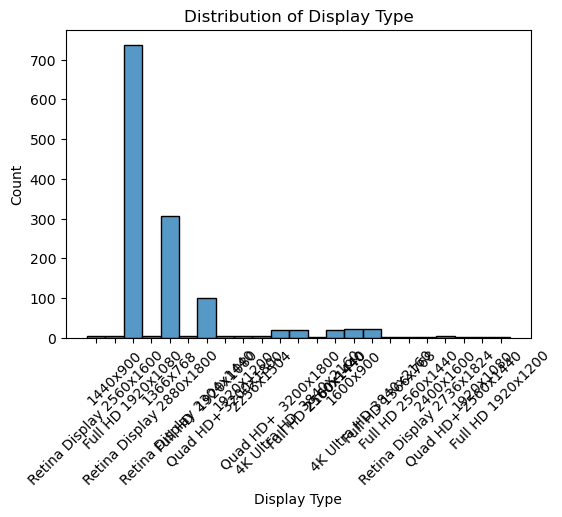

In [71]:

histogram_plot(df, "DisplayType")

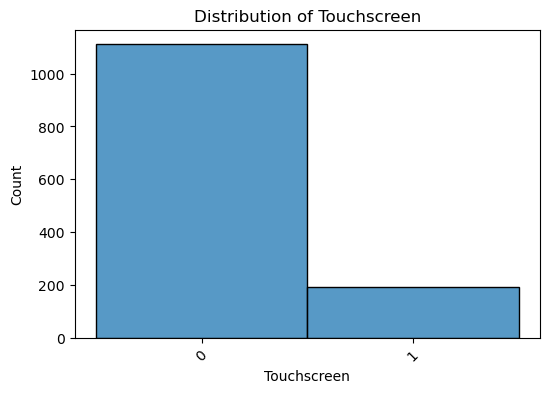

In [72]:

histogram_plot(df, "Touchscreen")

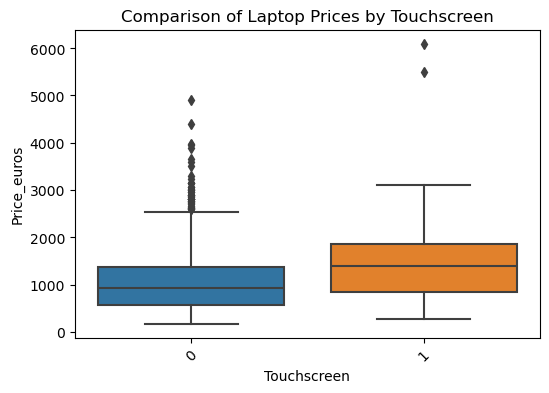

In [73]:
boxplots(df, "Touchscreen", h=4, w=6)

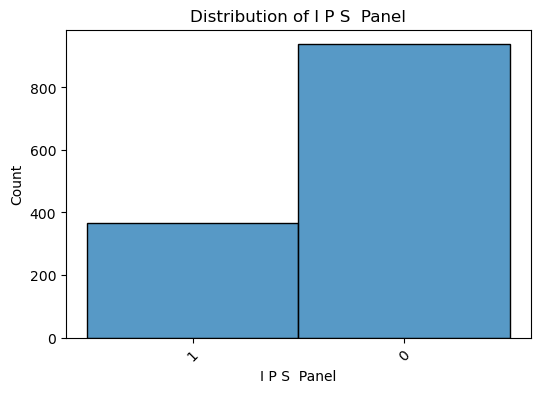

In [74]:

histogram_plot(df, "IPS Panel")

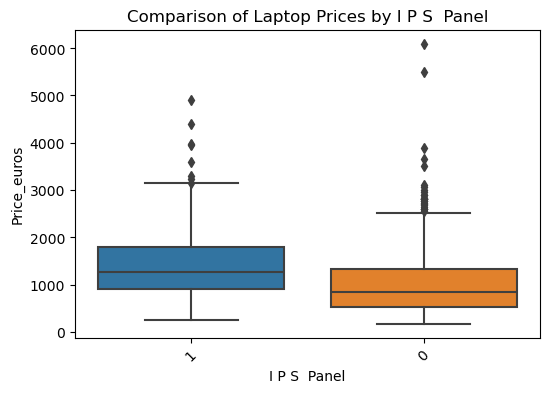

In [75]:
boxplots(df, "IPS Panel", h=4, w=6)

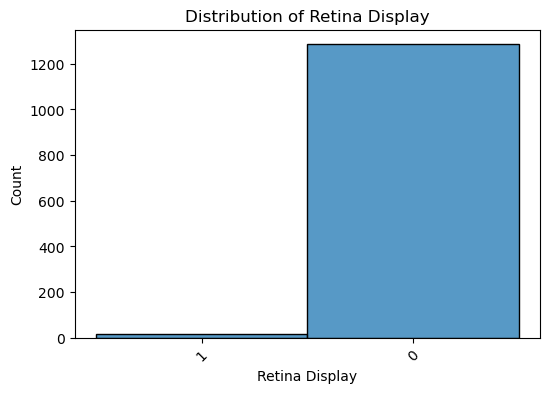

In [76]:

histogram_plot(df, "RetinaDisplay")

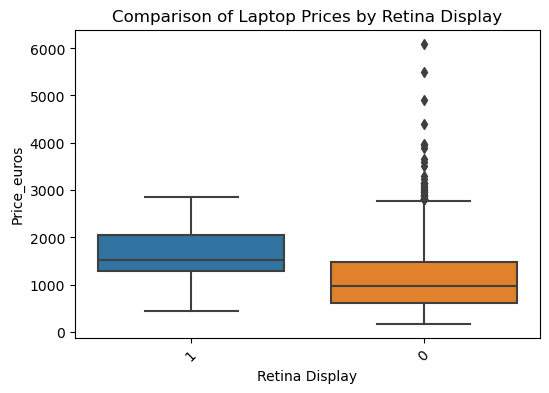

In [77]:
boxplots(df, "RetinaDisplay", h=4, w=6)

In [78]:
df["RetinaDisplay"].value_counts()

RetinaDisplay
0    1286
1      17
Name: count, dtype: int64

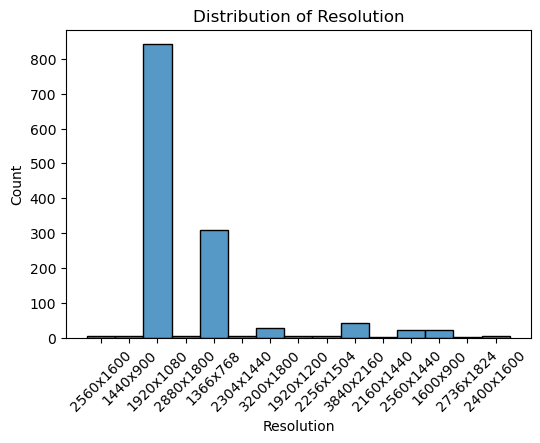

In [79]:

histogram_plot(df, "Resolution")

In [80]:
df["Resolution"].value_counts()

Resolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [81]:
# Split the "Resolution" column into "Width" and "Height" columns
df[['ResolutionWidth', 'ResolutionHeight']] = df['Resolution'].str.split('x', expand=True)

# Convert the columns to integers
df['ResolutionWidth'] = df['ResolutionWidth'].astype(int)
df['ResolutionHeight'] = df['ResolutionHeight'].astype(int)

# Drop the original "Resolution" column
df.drop('Resolution', axis=1, inplace=True)
display(df.head())

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,LogPrice,Model,Inches_Binned,DisplayType,Touchscreen,IPS Panel,RetinaDisplay,ResolutionWidth,ResolutionHeight
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,7.200194,MacBook,2,Retina Display 2560x1600,0,1,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,6.801216,Macbook,2,1440x900,0,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,6.354370,250,4,Full HD 1920x1080,0,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,7.838915,MacBook,4,Retina Display 2880x1800,0,1,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,7.497540,MacBook,2,Retina Display 2560x1600,0,1,1,2560,1600


In [82]:
# checking types and null values
df[["ResolutionWidth", "ResolutionHeight"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ResolutionWidth   1303 non-null   int64
 1   ResolutionHeight  1303 non-null   int64
dtypes: int64(2)
memory usage: 20.5 KB


In [83]:
df[["ResolutionWidth", "ResolutionHeight"]].describe()

,ResolutionWidth,ResolutionHeight
count,1303.000000,1303.000000
mean,1894.784344,1070.830391
std,494.641028,284.519410
min,1366.000000,768.000000
25%,1600.000000,900.000000
50%,1920.000000,1080.000000
75%,1920.000000,1080.000000
max,3840.000000,2160.000000


In [84]:
df["ResolutionWidth"].corr(df["ResolutionHeight"])

0.9942189599091069

In [85]:
df["ResolutionWidth"].nunique()

13

In [86]:
df["ResolutionWidthCat"] = df['ResolutionWidth'].astype('category')

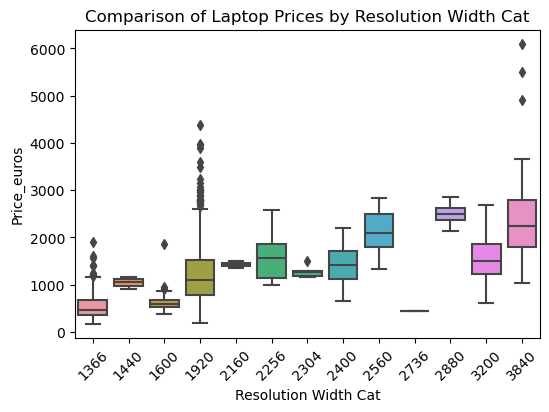

In [87]:
boxplots(df, "ResolutionWidthCat", h=4, w=6)

In [88]:
dummy_df = pd.get_dummies(df['ResolutionWidthCat'], prefix='ResolutionWidth')
test_df = pd.merge(dummy_df, y, left_index=True, right_index=True)

In [89]:
dummy_df.sum()

ResolutionWidth_1366    308
ResolutionWidth_1440      4
ResolutionWidth_1600     23
ResolutionWidth_1920    846
ResolutionWidth_2160      2
ResolutionWidth_2256      6
ResolutionWidth_2304      6
ResolutionWidth_2400      4
ResolutionWidth_2560     29
ResolutionWidth_2736      1
ResolutionWidth_2880      4
ResolutionWidth_3200     27
ResolutionWidth_3840     43
dtype: int64

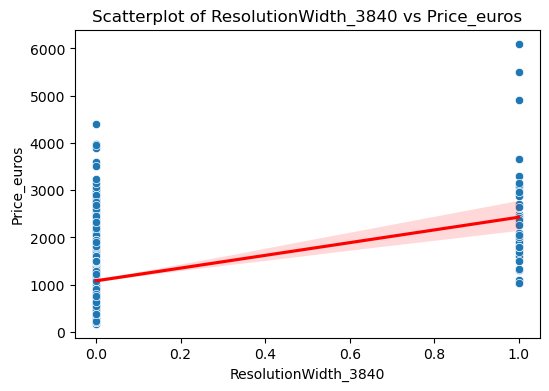

In [90]:
scatter_plot(test_df, "ResolutionWidth_3840", "Price_euros", regline=True)

In [91]:
X = pd.merge(df_dummies, y, left_index=True, right_index=True)

In [92]:
X = df[[ "ResolutionWidth"]]
merged_X = pd.merge(df_dummies, dummy_df, left_index=True, right_index=True)
y = df["Price_euros"]

In [93]:
model = LinearRegression()
model.fit(merged_X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(merged_X)


mse = ((y - y_pred) ** 2).mean()
r2 = model.score(merged_X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 945.1874077171398
Coefficients: [  705.03633034   353.09186646   386.52899117   175.88438536
   914.7537605   -613.33352043  -259.61927418 -1185.72638561
   -88.89462283   125.72072582   314.02905916  -370.32373806
  -227.22373806   757.70050179 -1201.22373806  1372.77570692
   280.57628138  1095.54274215]
Mean Squared Error: 256118.1391842131
R^2 Score: 0.47542428472787035


In [94]:
n = 1303    # Number of observations
k = 3      # Number of predictors

adj_R2 = adjusted_r_squared(r2, n, k)
print("Adjusted R-squared:", adj_R2)

Adjusted R-squared: 0.47421279346858136


In [95]:
_ = df[["Touchscreen", "IPS Panel", "RetinaDisplay"]]
X = pd.merge(merged_X, _, left_index=True, right_index=True)



In [96]:
X

,Inches_1,Inches_2,Inches_3,Inches_4,Inches_5,ResolutionWidth_1366,ResolutionWidth_1440,ResolutionWidth_1600,ResolutionWidth_1920,ResolutionWidth_2160,...,ResolutionWidth_2304,ResolutionWidth_2400,ResolutionWidth_2560,ResolutionWidth_2736,ResolutionWidth_2880,ResolutionWidth_3200,ResolutionWidth_3840,Touchscreen,IPS Panel,RetinaDisplay
0,0,1,0,0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,0,1,1
1,0,1,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,0,0,0
2,0,0,0,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,0,0,0
3,0,0,0,1,0,False,False,False,False,False,...,False,False,False,False,True,False,False,0,1,1
4,0,1,0,0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,1,1,0
1299,0,1,0,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,1,1,0
1300,0,0,1,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
1301,0,0,0,1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [97]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X)


mse = ((y - y_pred) ** 2).mean()
r2 = model.score(X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 977.3029334407358
Coefficients: [  733.06544183   382.44037697   414.42006323   222.93416881
   958.27537405  -690.18087265  -321.08331041 -1261.36352488
  -188.87754995     8.27154477   182.56874686   -24.55032921
  -371.36093754   726.13140232  -855.45032921  1699.52844381
   145.49005137   950.87666471    69.99627607    55.98514482
  -461.90319088]
Mean Squared Error: 254258.11927027703
R^2 Score: 0.47923393788200186


In [98]:
n = 1303    # Number of observations
k = 3      # Number of predictors

adj_R2 = adjusted_r_squared(r2, n, k)
print("Adjusted R-squared:", adj_R2)

Adjusted R-squared: 0.4780312448978956


#### Cpu

In [99]:
df["Cpu"].nunique()

118

In [100]:
df["Cpu"].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: Cpu, dtype: object

In [101]:
# Define regular expression patterns to extract brand, product, and clock speed
brand_pattern = r"^([a-zA-Z0-9]+)"
clock_speed_pattern = r"([\d\.]+)GHz"

df["CpuBrand"] = df["Cpu"].str.extract(brand_pattern, expand=False)

def extract_product(cpu):
    return ' '.join(cpu.split(' ')[1:-1])

# apply the function to each row of the Cpu column and create a new column Product
df['CpuProduct'] = df['Cpu'].apply(extract_product)



df["CpuClockSpeed_GHz"] = df["Cpu"].str.extract(clock_speed_pattern, expand=False).astype(float)

# print the updated dataframe
display(df.head())

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,DisplayType,Touchscreen,IPS Panel,RetinaDisplay,ResolutionWidth,ResolutionHeight,ResolutionWidthCat,CpuBrand,CpuProduct,CpuClockSpeed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,Retina Display 2560x1600,0,1,1,2560,1600,2560,Intel,Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,0,0,0,1440,900,1440,Intel,Core i5,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,Full HD 1920x1080,0,0,0,1920,1080,1920,Intel,Core i5 7200U,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,Retina Display 2880x1800,0,1,1,2880,1800,2880,Intel,Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,Retina Display 2560x1600,0,1,1,2560,1600,2560,Intel,Core i5,3.1


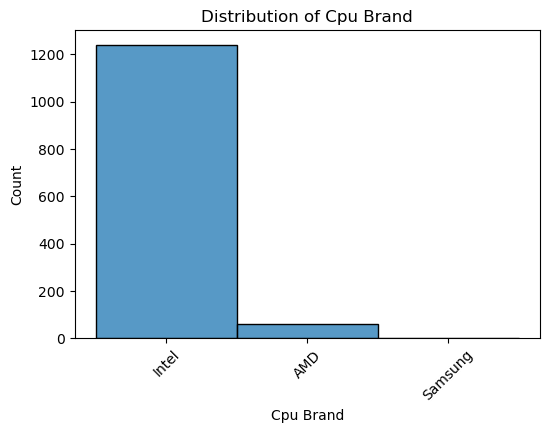

In [102]:

histogram_plot(df, "CpuBrand")

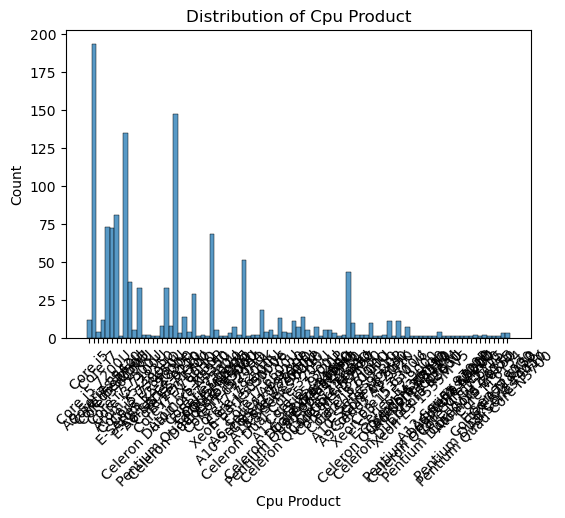

In [103]:

histogram_plot(df, "CpuProduct")

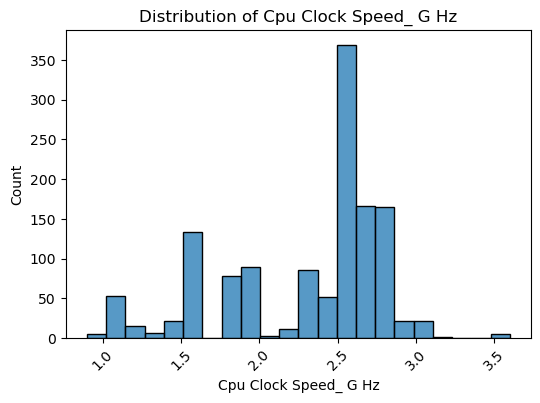

In [104]:

histogram_plot(df, "CpuClockSpeed_GHz")

In [105]:
df = df.drop("Cpu", axis=1)

#### Ram

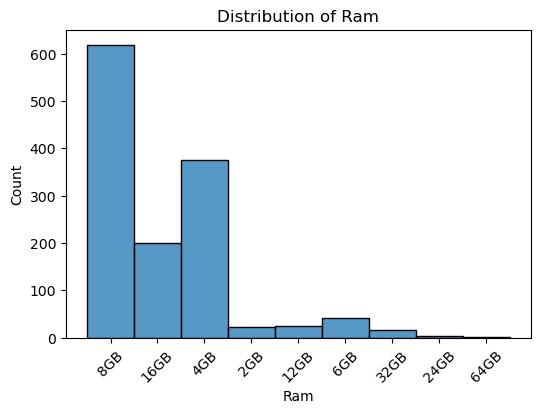

In [106]:

histogram_plot(df, "Ram")

In [107]:
df['Ram_GB'] = df['Ram'].str.extract('(\d+)').astype(int)
df["Ram_GB"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

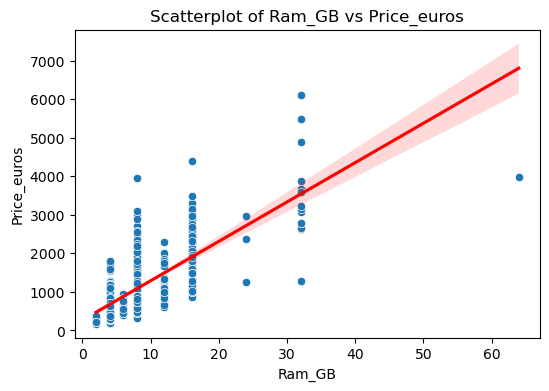

In [108]:
scatter_plot(df, "Ram_GB", "Price_euros", regline=True)

#### Memory

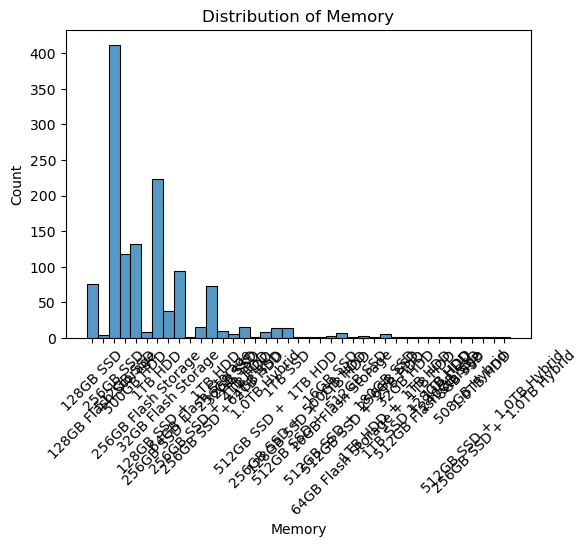

In [109]:

histogram_plot(df, "Memory")

In [110]:
# Spllitting the memory column
memory_split = df['Memory'].str.split(' + ', n=1, expand=True)
df['PrimaryMemory'] = memory_split[0]
df['SecondaryMemory'] = memory_split[1]

# Empty values will be "0" for now for calculation purposes
df["SecondaryMemory"].fillna(value="0", inplace=True)

display(df.head())

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,RetinaDisplay,ResolutionWidth,ResolutionHeight,ResolutionWidthCat,CpuBrand,CpuProduct,CpuClockSpeed_GHz,Ram_GB,PrimaryMemory,SecondaryMemory
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,1,2560,1600,2560,Intel,Core i5,2.3,8,128GB SSD,0
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,1440,900,1440,Intel,Core i5,1.8,8,128GB Flash Storage,0
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,1920,1080,1920,Intel,Core i5 7200U,2.5,8,256GB SSD,0
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,1,2880,1800,2880,Intel,Core i7,2.7,16,512GB SSD,0
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,1,2560,1600,2560,Intel,Core i5,3.1,8,256GB SSD,0


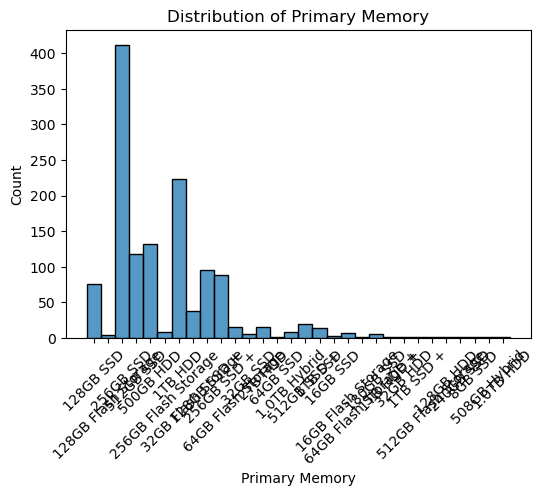

In [111]:

histogram_plot(df, "PrimaryMemory")

In [112]:
df.PrimaryMemory.value_counts()

PrimaryMemory
256GB SSD               412
1TB HDD                 223
500GB HDD               132
512GB SSD               118
128GB SSD +              96
256GB SSD +              88
128GB SSD                76
32GB Flash Storage       38
512GB SSD +              20
2TB HDD                  16
64GB Flash Storage       15
1TB SSD                  14
1.0TB Hybrid              9
256GB Flash Storage       8
16GB Flash Storage        7
32GB SSD                  6
180GB SSD                 5
128GB Flash Storage       4
16GB SSD                  3
1TB SSD +                 2
512GB Flash Storage       2
128GB HDD                 1
508GB Hybrid              1
8GB SSD                   1
240GB SSD                 1
64GB Flash Storage +      1
32GB HDD                  1
1TB HDD +                 1
64GB SSD                  1
1.0TB HDD                 1
Name: count, dtype: int64

In [113]:
df['PrimaryMemSize'] = df.PrimaryMemory.str.split().str[0]
df['PrimaryMemType'] = df.PrimaryMemory.str.split().str[1:].str.join(' ')


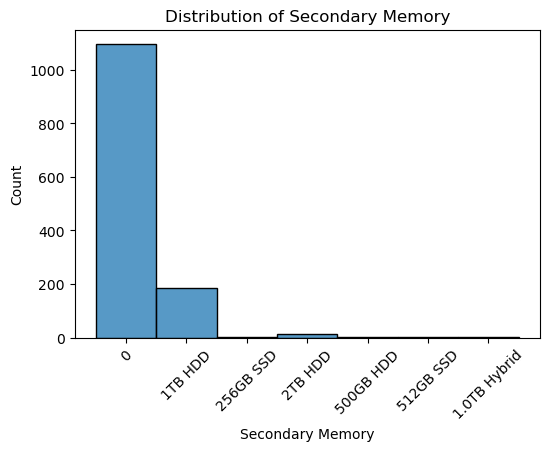

In [114]:

histogram_plot(df, "SecondaryMemory")

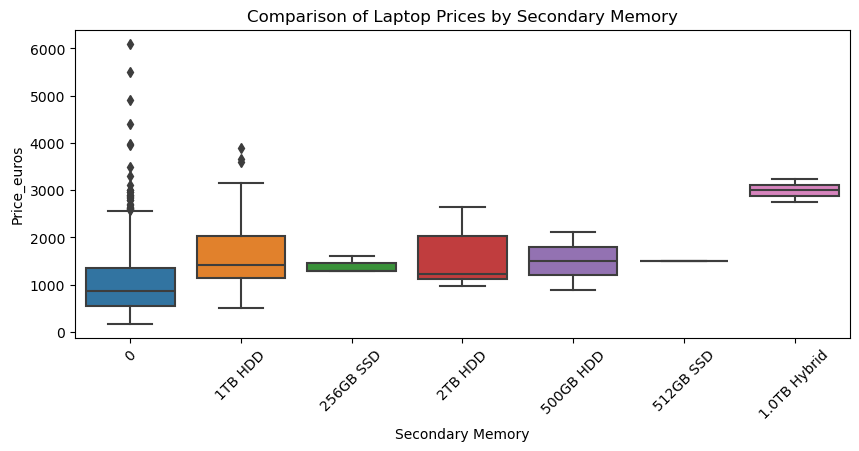

In [115]:
boxplots(df, "SecondaryMemory")

In [116]:
df.loc[df['SecondaryMemory'] != "0", 'SecondaryMemory'] = 1

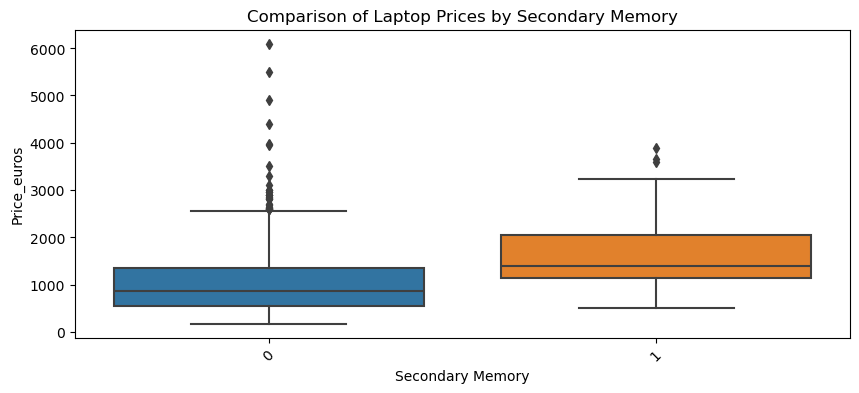

In [117]:
boxplots(df, "SecondaryMemory")

#### Gpu

In [118]:
df.Gpu.nunique()

110

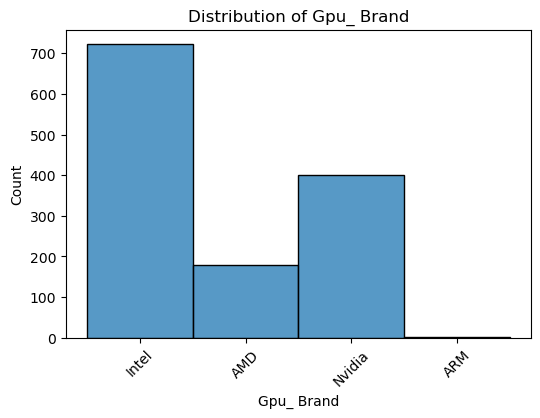

In [119]:
brand_pattern = r"^([a-zA-Z0-9]+)"
product_pattern = r'^\w+\s(.*)'

df["Gpu_Brand"] = df["Gpu"].str.extract(brand_pattern, expand=False)
df["Gpu_Product"] = df["Gpu"].str.extract(product_pattern, expand=False)

df = df.drop("Gpu", axis=1)

histogram_plot(df, "Gpu_Brand")

In [120]:
# only one ARM is in the data
df.Gpu_Brand.value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [121]:
df = df[df['Gpu_Brand'] != 'ARM']

In [122]:
df["Gpu_Product"].nunique()

109

In [123]:
df.Gpu_Product.value_counts().head(10)

Gpu_Product
HD Graphics 620     281
HD Graphics 520     185
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
GeForce 940MX        43
Radeon 530           41
HD Graphics 500      39
HD Graphics 400      37
GeForce GTX 1070     30
Name: count, dtype: int64

In [124]:
split_names = df['Gpu_Product'].str.split()
new_names = split_names.apply(lambda x: ' '.join(x[:-1]))

df['Gpu_Product'] = new_names

In [125]:
df["Gpu_Product"].nunique()

25

In [126]:
df.Gpu_Product.value_counts().head(26)

Gpu_Product
HD Graphics           610
GeForce GTX           207
GeForce               127
Radeon                 80
UHD Graphics           68
Radeon R5              43
Quadro                 31
HD                     29
GeForce GTX 1050       28
Radeon R7              25
Radeon RX              12
Iris Plus Graphics     10
GeForce GT              5
FirePro                 5
Radeon R4               5
Radeon R2               4
Iris Graphics           3
Radeon Pro              3
R4                      1
GTX 980                 1
                        1
Iris Pro                1
GeForce GTX1050         1
Graphics                1
Radeon R9               1
Name: count, dtype: int64

#### OpSys Feature

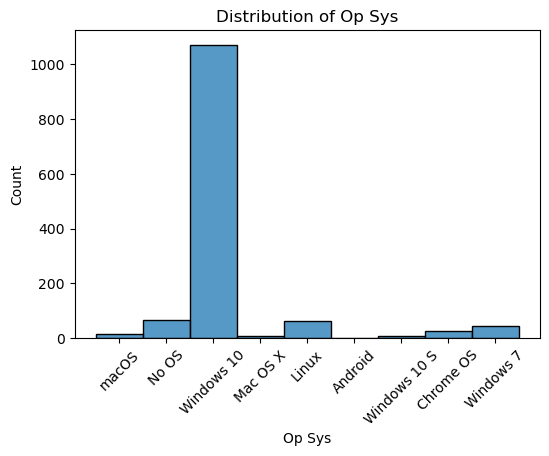

In [127]:
histogram_plot(df, "OpSys")

In [128]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

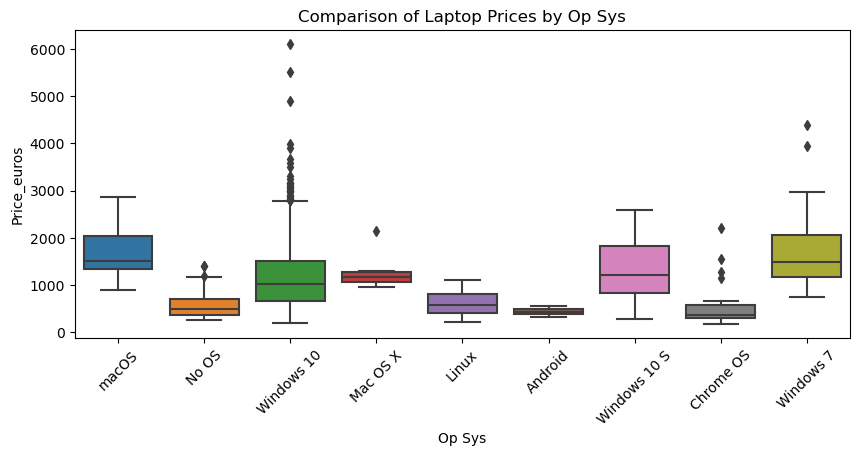

In [129]:
boxplots(df, "OpSys")

In [130]:
#df["OpSys2"] = df["OpSys"].copy()

In [131]:
map = {False: 0, True: 1} 
df_dummies = pd.get_dummies(df["OpSys"], prefix="OpSys", drop_first=True)

df_dummies = df_dummies.applymap(lambda x: map.get(x, x))
df_dummies

X = df_dummies.copy()
y = df["Price_euros"]


model = LinearRegression()
model.fit(X, y)

# coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X)

mse = ((y - y_pred) ** 2).mean()
r2 = model.score(X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 434.00000000000114
Coefficients: [ 115.53076923  183.06887097  828.87125     153.97333333  734.13947761
  852.48       1252.65133333 1315.63076923]
Mean Squared Error: 437589.6860458367
R^2 Score: 0.10412165664351025


In [132]:
map_dict = {"Windows 10 S" : "Windows 10",
            "Mac OS X" : "macOS",
           "Chrome OS" : "Chrome/Android",
           "Android" : "Chrome/Android"}

df.OpSys = df.OpSys.replace(map_dict)

In [133]:
map = {False: 0, True: 1} 
df_dummies = pd.get_dummies(df["OpSys"], prefix="OpSys", drop_first=True)

df_dummies = df_dummies.applymap(lambda x: map.get(x, x))
df_dummies

X = df_dummies.copy()
y = df["Price_euros"]


model = LinearRegression()
model.fit(X, y)

# coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X)

mse = ((y - y_pred) ** 2).mean()
r2 = model.score(X, y)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 541.2785714285715
Coefficients: [  75.79029954   46.6947619   627.73750265 1145.3727619  1022.92      ]
Mean Squared Error: 438595.3584171749
R^2 Score: 0.10206274134745963


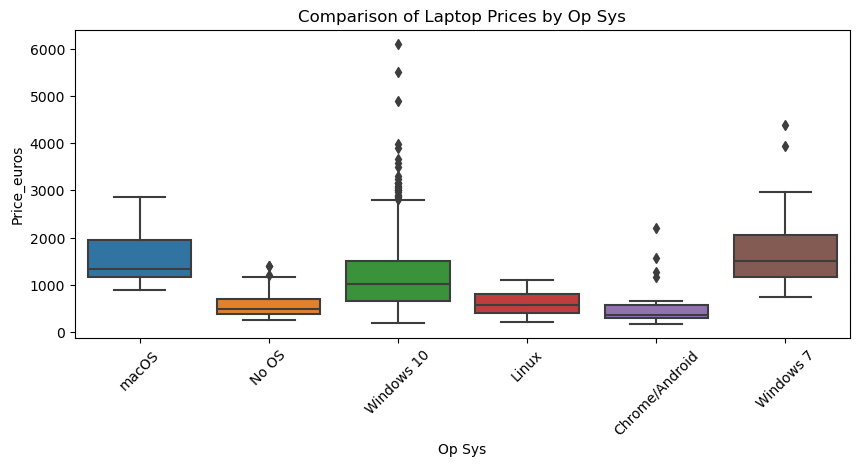

In [134]:
boxplots(df, "OpSys")

#### Weight Feature

In [135]:
df.Weight.nunique()

179

In [136]:
df["Weight"] = df["Weight"].str.rstrip("kg").astype(float)
df = df.rename(columns={"Weight": "Weight_kg"})

In [137]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,OpSys,Weight_kg,Price_euros,LogPrice,...,CpuBrand,CpuProduct,CpuClockSpeed_GHz,Ram_GB,PrimaryMemory,SecondaryMemory,PrimaryMemSize,PrimaryMemType,Gpu_Brand,Gpu_Product
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,macOS,1.37,1339.69,7.200194,...,Intel,Core i5,2.3,8,128GB SSD,0,128GB,SSD,Intel,Iris Plus Graphics
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,macOS,1.34,898.94,6.801216,...,Intel,Core i5,1.8,8,128GB Flash Storage,0,128GB,Flash Storage,Intel,HD Graphics
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,No OS,1.86,575.00,6.354370,...,Intel,Core i5 7200U,2.5,8,256GB SSD,0,256GB,SSD,Intel,HD Graphics
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,macOS,1.83,2537.45,7.838915,...,Intel,Core i7,2.7,16,512GB SSD,0,512GB,SSD,AMD,Radeon Pro
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,macOS,1.37,1803.60,7.497540,...,Intel,Core i5,3.1,8,256GB SSD,0,256GB,SSD,Intel,Iris Plus Graphics


In [138]:
df.Weight_kg.describe()

count    1302.000000
mean        2.039416
std         0.665274
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: Weight_kg, dtype: float64

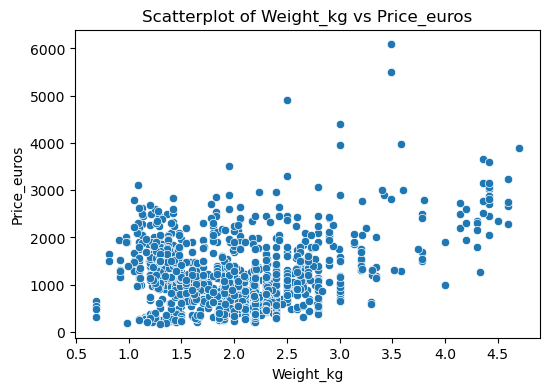

In [139]:
scatter_plot(df, "Weight_kg", "Price_euros")

#### Pair plot

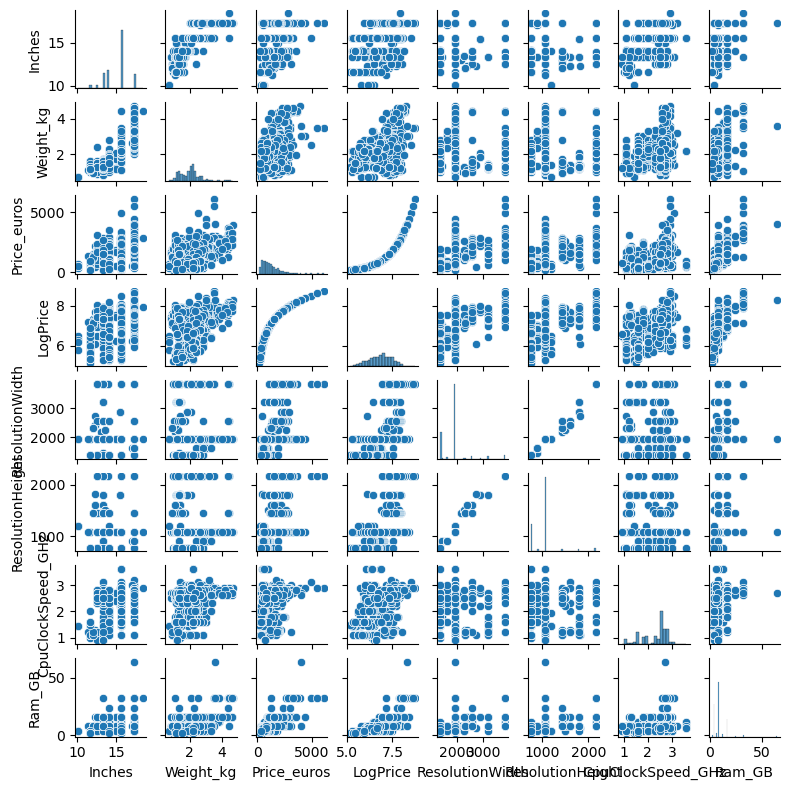

In [140]:
continuous_vars = df.select_dtypes(include=['float', 'int'])

# Plot scatterplot matrix
sns.pairplot(data=continuous_vars, kind="scatter", height=1);

#### Correlations

In [141]:
continuous_vars.corr()

,Inches,Weight_kg,Price_euros,LogPrice,ResolutionWidth,ResolutionHeight,CpuClockSpeed_GHz,Ram_GB
Inches,1.000000,0.827397,0.067329,0.043577,-0.069875,-0.092934,0.307476,0.237129
Weight_kg,0.827397,1.000000,0.209867,0.151222,-0.031866,-0.052041,0.320090,0.383362
Price_euros,0.067329,0.209867,1.000000,0.927564,0.557369,0.554591,0.430122,0.742905
LogPrice,0.043577,0.151222,0.927564,1.000000,0.552926,0.551000,0.504021,0.684711
ResolutionWidth,-0.069875,-0.031866,0.557369,0.552926,1.000000,0.994480,0.184110,0.434095
ResolutionHeight,-0.092934,-0.052041,0.554591,0.551000,0.994480,1.000000,0.170761,0.426357
CpuClockSpeed_GHz,0.307476,0.320090,0.430122,0.504021,0.184110,0.170761,1.000000,0.367764
Ram_GB,0.237129,0.383362,0.742905,0.684711,0.434095,0.426357,0.367764,1.000000


#### Saving Data

In [142]:
df.to_csv("../input/laptop_price_cleaned.csv", index=False)